# Advanced Image Processing Assignment-3
Team:- Dhyanil Mehta (202011032), Kishan Vaishnani (202011004)

## Importing necessary libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

building_img_path = "Assignment3/building.jpg"
einstein_img_path = "Assignment3/einstein.jpg"
forest_img_path = "Assignment3/forest.jpg"
lena_img_path = "Assignment3/Lena.jpg"
trans_img_path = "Assignment3/trans.jpg"

## 1. Decompose the Building image (Fig.1) into 8 bit planes. Show the bit planes. Then reconstruct the image back by removing three least significant bit planes. What will happen if you reconstruct the image by removing three most significant bit planes?

![building.jpg](Assignment3/building.jpg "Fig.1 building.jpg")
### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Fig.1 building.jpg

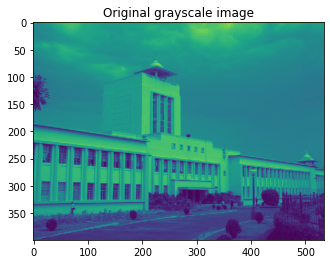

In [2]:
# Read the image in grayscale
building_img = cv2.imread(building_img_path, 0)

#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
binary_pixels = []
for i in range(building_img.shape[0]):
    for j in range(building_img.shape[1]):
        binary_pixels.append(np.binary_repr(building_img[i][j], width=8))  # width = no. of bits

# binary_pixels will have a list of binary strings for each pixel value. To extract bit planes we need to iterate over the
# strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in binary_pixels],dtype = np.uint8) * 128).reshape(building_img.shape[0],building_img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in binary_pixels],dtype = np.uint8) * 64).reshape(building_img.shape[0],building_img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in binary_pixels],dtype = np.uint8) * 32).reshape(building_img.shape[0],building_img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in binary_pixels],dtype = np.uint8) * 16).reshape(building_img.shape[0],building_img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in binary_pixels],dtype = np.uint8) * 8).reshape(building_img.shape[0],building_img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in binary_pixels],dtype = np.uint8) * 4).reshape(building_img.shape[0],building_img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in binary_pixels],dtype = np.uint8) * 2).reshape(building_img.shape[0],building_img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in binary_pixels],dtype = np.uint8) * 1).reshape(building_img.shape[0],building_img.shape[1])

lst = [eight_bit_img, seven_bit_img, six_bit_img, five_bit_img, four_bit_img, three_bit_img, two_bit_img, one_bit_img]

# Display images
fig, ax = plt.subplots(4, 2, figsize=(20,20))
idx = 0
for i in range(4):
    for j in range(2):
        ax[i, j].imshow(lst[idx])
        ax[i, j].set_title(f'{8-idx}th bit')
        ax[i, j].set_aspect('equal')
        # cv2.imwrite(f'Assignment3/building_{8-idx}_bit.jpg', lst[idx])
        idx += 1
plt.savefig('Assignment3/building_bit_planes.png')
plt.show()

plt.imshow(building_img)
plt.title("Original grayscale image")
plt.show()

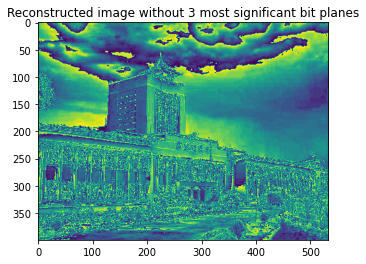

In [3]:
# Reconstructing image without three least significant bit planes
recon_img_1 = eight_bit_img + seven_bit_img + six_bit_img + five_bit_img + four_bit_img
plt.imshow(recon_img_1)
plt.title("Reconstructed image without 3 least significant bit planes")
plt.show()
cv2.imwrite('Assignment3/building_not_least3.png', recon_img_1)

# Reconstructing image without three least significant bit planes
recon_img_2 = five_bit_img + four_bit_img + three_bit_img + two_bit_img + one_bit_img
plt.imshow(recon_img_2)
plt.title("Reconstructed image without 3 most significant bit planes")
plt.show()
cv2.imwrite('Assignment3/building_not_most3.png', recon_img_2)

## 2. Write a program which will transform a given image (Fig.2(a)) in such way that the resultant image histogram is equivalent to histogram of another image (Fig.2(b)). In the process, show the individual histograms and the intensity transformation curve.
### *[Hint: Use the histogram specification algorithm].*
![einstein.jpg](Assignment3/einstein.jpg 'Fig.2(a) einstein.jpg') &emsp;
![Lena.jpg](Assignment3/Lena.jpg 'Fig.2(b) Lena.jpg')
### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Fig.2(a) einstein.jpg &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Fig.2(b) Lena.jpg

Loading einstein and lena images...
211
255
Performing histogram matching...


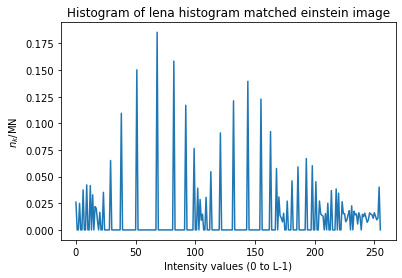

In [8]:
# import the necessary packages
from skimage import exposure

# loading images
print("Loading einstein and lena images...")
einstein = cv2.imread(einstein_img_path)
lena = cv2.imread(lena_img_path)

print(np.max(einstein))
print(np.max(lena))

# Perform histogram matching
print("Performing histogram matching...")
multi = True if einstein.shape[-1] > 1 else False
matched = exposure.match_histograms(einstein, lena, multichannel=multi)
cv2.imwrite("Assignment3/einstein_matched.jpg", matched)

# Show the output images with their histograms
plt.imshow(einstein)
# hist_einstein = cv2.calcHist([einstein], [0], None, [256], [0, 256])
hist_einstein, _ = np.histogram(einstein.ravel(), 256)
plt.figure()
plt.plot(hist_einstein / (einstein.shape[0]*einstein.shape[1]))
plt.title("Einstein histogram")
plt.xlabel("Intensity values (0 to L-1)")
plt.ylabel("$n_k$/MN")
plt.savefig("Assignment3/histo_einstein.jpg")

plt.figure()
plt.imshow(lena)
# hist_lena = cv2.calcHist([lena], [0], None, [256], [0, 256])
hist_lena, _ = np.histogram(lena.ravel(), 256)
plt.figure()
plt.plot(hist_lena / (lena.shape[0]*lena.shape[1]))
plt.title("Lena histogram")
plt.xlabel("Intensity values (0 to L-1)")
plt.ylabel("$n_k$/MN")
plt.savefig("Assignment3/histo_lena.jpg")

plt.figure()
plt.imshow(matched)
# hist_matched = cv2.calcHist([matched],[0],None,[256],[0,256])
hist_matched, _ = np.histogram(matched.ravel(), 256)
plt.figure()
plt.plot(hist_matched / (matched.shape[0]*matched.shape[1]))
plt.title("Histogram of lena histogram matched einstein image")
plt.xlabel("Intensity values (0 to L-1)")
plt.ylabel("$n_k$/MN")
plt.savefig("Assignment3/histo_matched.jpg")

# Plot intensity transformation curve of einstein and histogram matched einstein image

{0: 176, 1: 176, 2: 176, 3: 176, 4: 176, 5: 176, 6: 176, 7: 177, 8: 177, 9: 178, 10: 180, 11: 180, 12: 182, 13: 185, 14: 185, 15: 189, 16: 190, 17: 193, 18: 195, 19: 198, 20: 204, 21: 208, 22: 212, 23: 212, 24: 214, 25: 214, 26: 214, 27: 215, 28: 215, 29: 215, 30: 216, 31: 217, 32: 217, 33: 217, 34: 219, 35: 220, 36: 221, 37: 223, 38: 223, 39: 224, 40: 224, 41: 224, 42: 226, 43: 226, 44: 226, 45: 227, 46: 227, 47: 228, 48: 229, 49: 229, 50: 229, 51: 231, 52: 231, 53: 232, 54: 233, 55: 234, 56: 234, 57: 235, 58: 236, 59: 236, 60: 236, 61: 236, 62: 237, 63: 238, 64: 238, 65: 238, 66: 238, 67: 238, 68: 238, 69: 238, 70: 238, 71: 238, 72: 238, 73: 238, 74: 238, 75: 239, 76: 239, 77: 239, 78: 239, 79: 240, 80: 240, 81: 241, 82: 241, 83: 242, 84: 242, 85: 242, 86: 242, 87: 242, 88: 242, 89: 243, 90: 243, 91: 243, 92: 244, 93: 244, 94: 244, 95: 244, 96: 244, 97: 244, 98: 244, 99: 244, 100: 244, 101: 244, 102: 244, 103: 244, 104: 244, 105: 245, 106: 245, 107: 245, 108: 245, 109: 245, 110: 245,

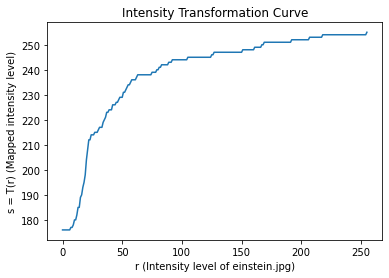

In [6]:
cdf_einstein, _ = exposure.cumulative_distribution(hist_matched / (matched.shape[0] * matched.shape[1]))
mapping = {}
for j in range(0, 256):
    mapping[j] = math.floor(255 * cdf_einstein[j])

print(mapping)
plt.figure()
plt.plot(mapping.keys(), mapping.values())
plt.title("Intensity Transformation Curve")
plt.xlabel("r (Intensity level of einstein.jpg)")
plt.ylabel("s = T(r) (Mapped intensity level)")
plt.savefig("Assignment3/intensity_trans_curve.jpg")

## 3. Perform gamma transformation and histogram equalization (separately) on the given hazy image *(Fig.3(a))* to enhance the contrast of the image. Choose the parameter (if any) of these transformations such that the resultant images have dehazing effects. Fuse both the images to generate a single image such that it has better visual appearance. Note that the objective is to get a better dehazed result.
### Now, consider the haze model
### **$I(x) = J(x)t(x) + A(1 − t(x))$**,
where $I(x)$ is the given hazy image. $J(x)$ can be approximated with resultant image that
have been generated by fusing the results of gamma transformation and histogram equalization.
Assume the atmospheric light is **A = [0.8159, 0.8186, 0.8272]**. Now estimate the transmission
map $t(x)$ using the above equation. To see the accuracy of the results, compute the Euclidean
distance between the estimated transmission map and the given transmission map *(Fig.3(b))*.
A lower distance indicates a better dehazing result.

<img src='Assignment3/forest.jpg' alt='forest.jpg' width=auto height=300/> &emsp;
<img src='Assignment3/trans.jpg' alt='trans.jpg' width=auto height=300/>

### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Fig.3(a) forest.jpg &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; Fig.3(b) trans.jpg

Performing Gamma Transformation and Histogram Equalization on the *forest.jpg* image

In [15]:
def gamma_transformation(gamma,img_path,flag=True):
    img_obj = cv2.imread(img_path) 

    # Apply gamma correction. 
    gamma_corrected = np.array(255*(img_obj / 255) ** gamma, dtype = 'uint8') 
    
    res=np.hstack((cv2.imread(forest_img_path),gamma_corrected))
    # save edited image.
    if flag:
        cv2.imwrite('Assignment3/gamma_transformed.jpg', res)
    else:
        cv2.imwrite('Assignment3/gamma_transformed'+'_histo'+'.jpg',res)
    cv2.imwrite('Assignment3/gamma.jpg',gamma_corrected)
    
gamma_transformation(1.5,forest_img_path)

def histo_equi(img_path,flag=True):
    img_obj = cv2.imread(img_path)
    equ = img_obj.copy()
    equ[:,:,0] = cv2.equalizeHist(equ[:,:,0])
    equ[:,:,1] = cv2.equalizeHist(equ[:,:,1])
    equ[:,:,2] = cv2.equalizeHist(equ[:,:,2])

    res = np.hstack((cv2.imread(forest_img_path),equ)) #stacking images side-by-side
    if flag:    
        cv2.imwrite('Assignment3/histo_corrected.jpg',res)
    else:
        cv2.imwrite('Assignment3/histo_corrected'+'_gamma'+'.jpg',res)
    cv2.imwrite('Assignment3/histo.jpg',equ)

histo_equi(forest_img_path)

# histo_equi('Assignment3/gamma.jpg',flag=False)
# gamma_transformation(1.5,'Assignment3/histo.jpg',flag=False)

Comparing estimated transmission map of *forest.jpg* with *trans.jpg*

In [7]:
def get_dark_channel(hazy_img_i, window_size):
    m, n, _ = hazy_img_i.shape
    padded = np.pad(hazy_img_i, ((window_size // 2, window_size // 2), (window_size // 2, window_size // 2), (0, 0)), 'edge')
    darkch = np.zeros((m, n))
    for i_idx, j_idx in np.ndindex(darkch.shape):
        darkch[i_idx, j_idx] = np.min(padded[i_idx:i_idx + window_size, j_idx:j_idx + window_size, :])
    return darkch

def get_transmission(hazy_img_i, atm_a, window_size):
    # hazy_img_i = hazy_img_i / 255
    atm_a = np.array([atm_a[0] * 255, atm_a[1] * 255, atm_a[2] * 255], dtype=np.uint8)
    return 1 - get_dark_channel(hazy_img_i / atm_a, window_size)

I_x = cv2.imread(forest_img_path)
A = [0.8159, 0.8186, 0.8272]
# J_x = cv2.imread('Assignment3/gamma.jpg')
t_x = get_transmission(I_x, A, 6)
t_x = (t_x * 255).astype(np.uint8)

estimated_trans = np.zeros((t_x.shape[0], t_x.shape[1], 3))
estimated_trans[:,:,0] = t_x
estimated_trans[:,:,1] = t_x
estimated_trans[:,:,2] = t_x
cv2.imwrite("Assignment3/estimated_forest_trans.jpg", estimated_trans)

True

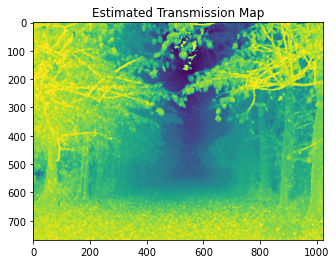

In [8]:
plt.imshow(t_x)
plt.title("Estimated Transmission Map")
plt.savefig("Assignment3/estimated_forest_trans_plt.jpg")

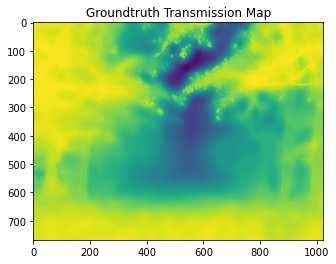

In [9]:
trans_img = cv2.imread(trans_img_path)
trans_img = trans_img[:,:,0]
plt.imshow(trans_img)
plt.title("Groundtruth Transmission Map")

In [10]:
# histogram_trans = cv2.calcHist([trans_img], [0], None, [256], [0, 256])
histogram_trans, _ = np.histogram(trans_img, 256)
# histogram_tx = cv2.calcHist([t_x], [0], None, [256], [0, 256])
histogram_tx, _ = np.histogram(t_x, 256)

similarity = 0

# Euclidean Distace
i = 0
while i < len(histogram_trans) and i < len(histogram_tx): 
    similarity += (histogram_trans[i]-histogram_tx[i])**2
    i += 1

similarity = np.sqrt(similarity)
print(similarity)

similarity1 = np.sqrt(np.sum((trans_img.ravel() - t_x.ravel()) ** 2))
print(similarity1)

print(np.linalg.norm(trans_img - t_x))

52869.896235948865
9007.890430061858
67919.1091372671
